In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
def choose(n, k):
    if n == k:
        return [[1]*k]
    subsets = [[0] + a for a in choose(n-1,k)]
    if k > 0:
        subsets += [[1] + a for a in choose(n-1,k-1)]
    return subsets

def graham_sloane_codes(n):
    def code_sum(codeword):
        return sum([i*c for i, c in enumerate(codeword)]) % n
    return [c for c in choose(n, 4) if code_sum(c) == 0]

In [3]:
from numpy.random import permutation, rand, normal
from numpy import ones, zeros, concatenate, array, float
from numpy.random import poisson
from pandas import DataFrame, concat
from skimage.filters import gaussian

p = {'N_high':4,
'N_barcode':8,
'N_flour':200,
'N_photons_per_flour':50,
'N_photon_background':1000,
'detection_efficiency':.25,
'N_background_electrons':1,
'N_spots':100,
'N_size':100,
'psf':2,
'graylevel' : 37000.0/2**16, #dynamic range 37,000 and 16-bit AD converter
'bits': 16
}


p = {'N_high':4,
'N_barcode':8,
'N_flour':200,
'N_photons_per_flour':50,
'N_photon_background':0,
'detection_efficiency':1,
'N_background_electrons':0,
'N_spots':100,
'N_size':100,
'psf':3,
'graylevel' : 37000.0/2**16, #dynamic range 37,000 and 16-bit AD converter
'bits': 16
}

codebook = graham_sloane_codes(p['N_barcode'])

def generate_spot(p):
    position = rand(2)
    gene = random.choice(range(len(codebook)))
    barcode = array(codebook[gene])
    photons = [poisson(p['N_photons_per_flour'])*poisson(p['N_flour'])*b for b in barcode]
    return DataFrame({'position': [position], 'barcode': [barcode], 'photons': [photons], 'gene':gene})

In [4]:
spots = concat([generate_spot(p) for i in range(p['N_spots'])])

image = zeros((p['N_barcode'], p['N_size'], p['N_size'],))

for s in spots.itertuples():
    image[:, int(p['N_size']*s.position[0]), int(p['N_size']*s.position[1])] = s.photons

image_with_background = image + poisson(p['N_photon_background'], size = image.shape)
filtered = array([gaussian(im, p['psf']) for im in image_with_background])
filtered = filtered*p['detection_efficiency'] + normal(scale=p['N_background_electrons'], size=filtered.shape)
signal = [(x/p['graylevel']).astype(int).clip(0, 2**p['bits']) for x in filtered]

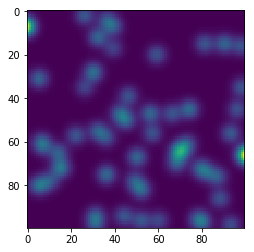

In [5]:
plt.imshow(signal[7])

In [6]:
spots

,barcode,gene,photons,position
0,"[1, 0, 0, 1, 0, 0, 1, 1]",6,"[7224, 0, 0, 6324, 0, 0, 9546, 9699]","[0.709098584335, 0.689544965579]"
0,"[1, 0, 0, 1, 0, 0, 1, 1]",6,"[13104, 0, 0, 9724, 0, 0, 8928, 8832]","[0.656733389857, 0.694205502175]"
0,"[0, 0, 1, 1, 0, 1, 1, 0]",0,"[0, 0, 9751, 7568, 0, 8404, 8626, 0]","[0.0953645506008, 0.231463614881]"
0,"[0, 1, 0, 1, 0, 1, 0, 1]",3,"[0, 10164, 0, 9165, 0, 9682, 0, 7960]","[0.964392062344, 0.603798797088]"
0,"[0, 0, 1, 1, 1, 0, 0, 1]",1,"[0, 0, 9888, 9202, 8865, 0, 0, 10452]","[0.0752254389534, 0.394877799261]"
0,"[1, 1, 0, 1, 1, 0, 0, 0]",7,"[7612, 9256, 0, 13293, 10504, 0, 0, 0]","[0.674676515281, 0.939266360875]"
0,"[1, 1, 0, 1, 1, 0, 0, 0]",7,"[8775, 9457, 0, 7400, 11388, 0, 0, 0]","[0.409653072516, 0.202893681104]"
0,"[0, 0, 1, 1, 0, 1, 1, 0]",0,"[0, 0, 12243, 9945, 0, 12528, 9464, 0]","[0.717271810864, 0.0721271165492]"
0,"[0, 0, 1, 1, 1, 0, 0, 1]",1,"[0, 0, 9400, 8955, 8232, 0, 0, 8556]","[0.746018368388, 0.820465110691]"
0,"[0, 1, 1, 0, 0, 0, 1, 1]",4,"[0, 11741, 10962, 0, 0, 0, 10200, 9744]","[0.768999049122, 0.871119369639]"
